In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, AveragePooling2D
import warnings
warnings.filterwarnings('ignore')

In [3]:
def load_images_and_labels(classes, cur_path, target_size=(32, 32)):
  data = []
  labels = []

  for i in range(classes):
    path = os.path.join(cur_path, 'Train', str(i))

    try:
      images = os.listdir(path)
      for a in images:
        try:
          image = Image.open(os.path.join(path, a))
          resized_image = image.resize(target_size)
          data.append(np.array(resized_image))
          labels.append(i)
        except (OSError, IOError) as e:
          print(f"Error loading image: {a} ({e})")
    except FileNotFoundError:
      print(f"Class directory not found: {path}")

  data = np.array(data)
  labels = np.array(labels)

  return data, labels

# Example usage:
classes = 43
cur_path = "i:\\class\\Term3\\BDM3035\\Project\\"
Glodata, Glolabels = load_images_and_labels(classes, cur_path)


In [4]:
# Make copies of Glodata and Glolabels
cus_data = np.copy(Glodata)
cus_label = np.copy(Glolabels)

Data shape: (21500, 32, 32, 3)
Labels shape: (21500,)


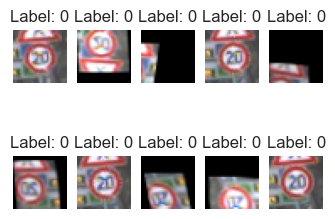

In [5]:
#1...validation of resizing of images

# Check sizes of data and labels
print("Data shape:", cus_data.shape)
print("Labels shape:", cus_label.shape)

# Visualize a few images along with their labels
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(4,3))
for i, ax in enumerate(axes.flat):
    ax.imshow(cus_data[i])
    ax.set_title(f"Label: {cus_label[i]}")
    ax.axis('off')

plt.show()

In [43]:
#train test split of images

from keras.utils import to_categorical
print("\n",cus_data.shape, cus_label.shape)
X_train, X_test, y_train, y_test = train_test_split(cus_data, cus_label, test_size=0.2, random_state=42)
print("\n",X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("\n",y_train," ",y_test)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print("\n",y_train," ",y_test)


 (21500, 32, 32, 3) (21500,)

 (17200, 32, 32, 3) (4300, 32, 32, 3) (17200,) (4300,)

 [17 21 23 ... 10  1 31]   [40 13 33 ... 16 26 23]

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]   [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Custom CNN Model**

In [44]:
# Create a Sequential model
TSRModel_custom = Sequential()

# Add layers to the model
TSRModel_custom.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
TSRModel_custom.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
TSRModel_custom.add(MaxPool2D(pool_size=(2, 2)))
TSRModel_custom.add(Dropout(rate=0.25))
TSRModel_custom.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
TSRModel_custom.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
TSRModel_custom.add(MaxPool2D(pool_size=(2, 2)))
TSRModel_custom.add(Dropout(rate=0.25))
TSRModel_custom.add(Flatten())
TSRModel_custom.add(Dense(256, activation='relu'))
TSRModel_custom.add(Dropout(rate=0.5))
TSRModel_custom.add(Dense(43, activation='softmax'))

# Compilation of the model
TSRModel_custom.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
TSRModel_custom.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [45]:
# Number of epochs for training
custom_epochs = 25

# Train the model
custom_history = TSRModel_custom.fit(X_train, y_train, batch_size=96, epochs=custom_epochs, validation_data=(X_test, y_test))

Epoch 1/25
180/180 [==============================] - 24s 118ms/step - loss: 4.4099 - accuracy: 0.0406 - val_loss: 3.4356 - val_accuracy: 0.1635
Epoch 2/25
180/180 [==============================] - 21s 115ms/step - loss: 2.5624 - accuracy: 0.3411 - val_loss: 1.6551 - val_accuracy: 0.6500
Epoch 3/25
180/180 [==============================] - 21s 116ms/step - loss: 1.6138 - accuracy: 0.5783 - val_loss: 0.9994 - val_accuracy: 0.7509
Epoch 4/25
180/180 [==============================] - 21s 115ms/step - loss: 1.2510 - accuracy: 0.6594 - val_loss: 0.8637 - val_accuracy: 0.7812
Epoch 5/25
180/180 [==============================] - 21s 116ms/step - loss: 1.1053 - accuracy: 0.6894 - val_loss: 0.7631 - val_accuracy: 0.7812
Epoch 6/25
180/180 [==============================] - 21s 117ms/step - loss: 0.9800 - accuracy: 0.7131 - val_loss: 0.6921 - val_accuracy: 0.8053
Epoch 7/25
180/180 [==============================] - 21s 117ms/step - loss: 0.9252 - accuracy: 0.7276 - val_loss: 0.6522 - val_ac

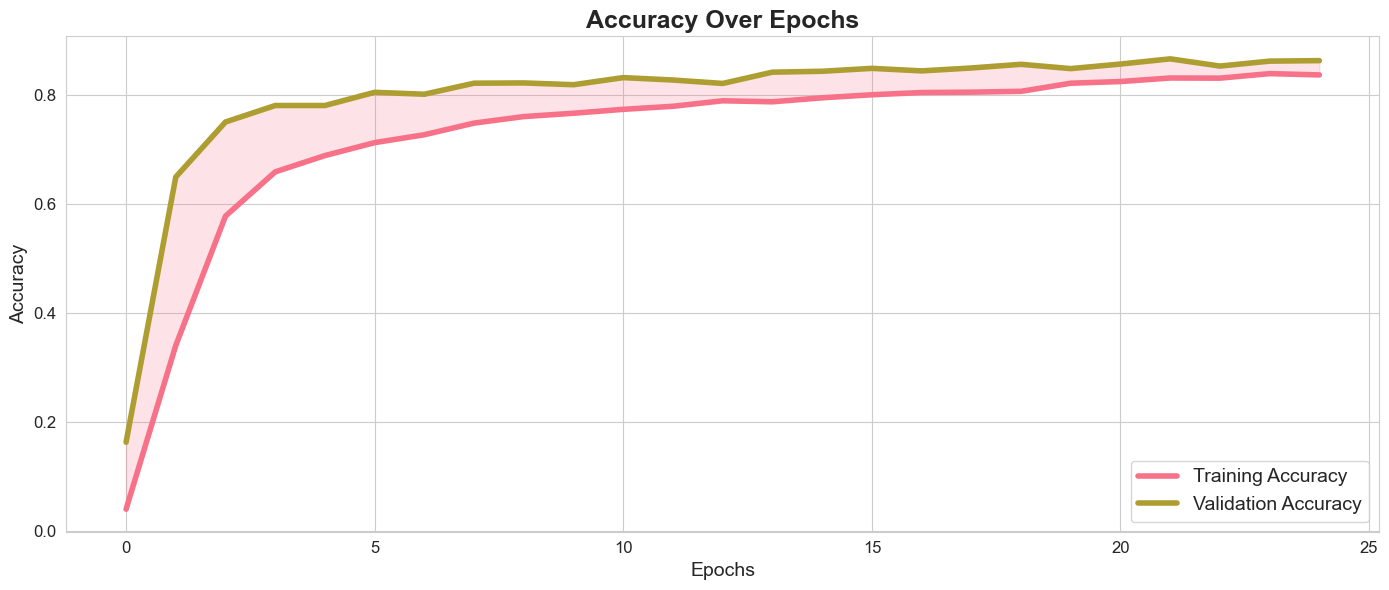

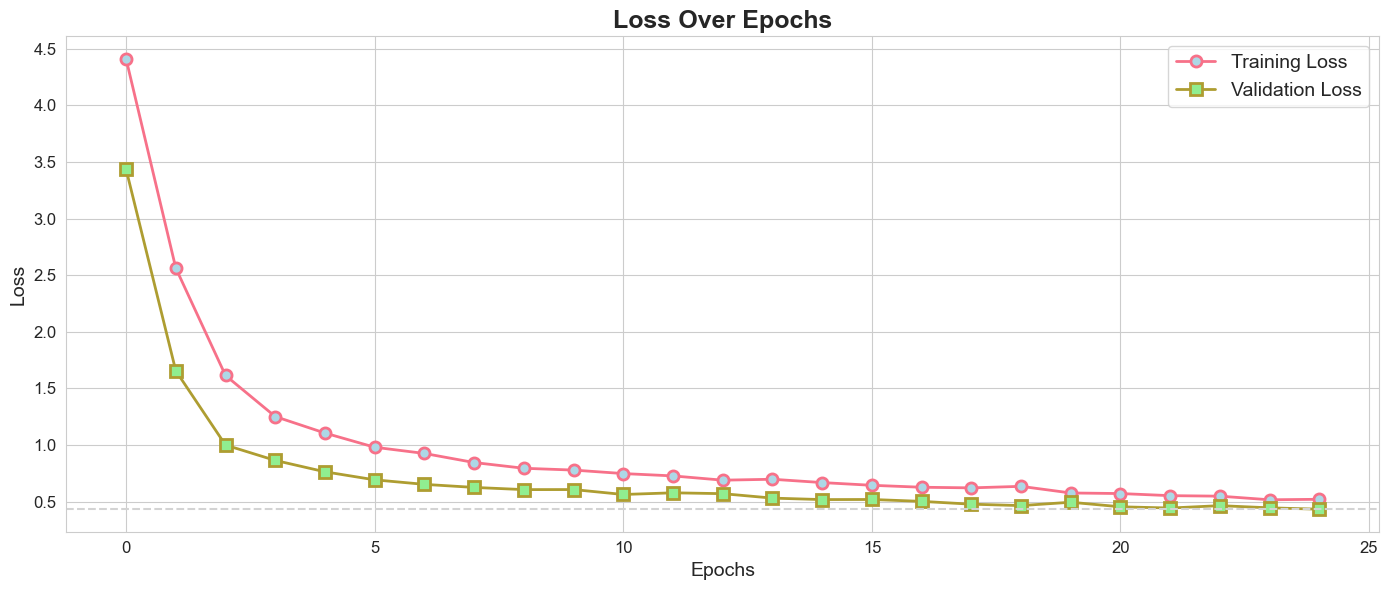

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Set a visually appealing style
sns.set_style('whitegrid')  # Clean background with gridlines
 
# Employ a vibrant color palette
colors = sns.color_palette('husl', 5)[:2]  # Select first two colors from a rich palette
 
# Plot accuracy with a smooth curve and shaded confidence region
plt.figure(figsize=(14, 6))  # Larger figure size
plt.plot(custom_history.history['accuracy'], label='Training Accuracy', color=colors[0], linewidth=4)
plt.plot(custom_history.history['val_accuracy'], label='Validation Accuracy', color=colors[1], linewidth=4)
plt.fill_between(range(len(custom_history.history['accuracy'])), custom_history.history['accuracy'], custom_history.history['val_accuracy'], alpha=0.2, color=colors[0])  # Shaded confidence region
plt.title('Accuracy Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
# Plot loss with a semi-transparent background and enhanced markers
plt.figure(figsize=(14, 6))
plt.plot(custom_history.history['loss'], label='Training Loss', color=colors[0], linewidth=2, marker='o', markersize=8, markerfacecolor='lightblue', markeredgewidth=2)
plt.plot(custom_history.history['val_loss'], label='Validation Loss', color=colors[1], linewidth=2, marker='s', markersize=8, markerfacecolor='lightgreen', markeredgewidth=2)
plt.axhline(y=min(custom_history.history['val_loss']), color='lightgray', linestyle='--', linewidth=1.5)  # Highlight minimum validation loss
plt.title('Loss Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
plt.show()

**Testing the model**

In [47]:
from sklearn.metrics import accuracy_score
import pandas as pd
from PIL import Image
import numpy as np

y_test = pd.read_csv('Test.csv')
labels_1 = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((32, 32))
    data.append(np.array(image))
X_test = np.array(data)

# Make predictions using predict
custom_pred_probabilities = TSRModel_custom.predict(X_test)  # Get class probabilities
custom_pred = np.argmax(custom_pred_probabilities, axis=1)  # Get class labels from probabilities

# Accuracy calculation
print(accuracy_score(labels_1, custom_pred))

395/395 [==============================] - 6s 14ms/step
0.8307996832937451


**LeNet-5 CNN Model**

In [55]:
# Make copies of Glodata and Glolabels
ln_data = np.copy(Glodata)
ln_label = np.copy(Glolabels)

In [60]:
#train test split of images

from keras.utils import to_categorical
print("\n",ln_data.shape, ln_label.shape)
X_train_ln, X_test_ln, y_train_ln, y_test_ln = train_test_split(ln_data, ln_label, test_size=0.2, random_state=42)
print("\n",X_train_ln.shape, X_test_ln.shape, y_train_ln.shape, y_test_ln.shape)
print("\n",y_train_ln," ",y_test_ln)
y_train_ln = to_categorical(y_train_ln, 43)
y_test_ln = to_categorical(y_test_ln, 43)
print("\n",y_train_ln," ",y_test_ln)


 (21500, 32, 32, 3) (21500,)

 (17200, 32, 32, 3) (4300, 32, 32, 3) (17200,) (4300,)

 [17 21 23 ... 10  1 31]   [40 13 33 ... 16 26 23]

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]   [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [61]:
# LeNet-5 model for traffic sign recognition, renamed to LNModel
LNModel = Sequential()
# Layer 1: Convolutional layer with 6 filters of size 5x5
LNModel.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
# Layer 2: Average pooling layer with pool size 2x2 and stride 2
LNModel.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
# Layer 3: Convolutional layer with 16 filters of size 5x5
LNModel.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# Layer 4: Average pooling layer with pool size 2x2 and stride 2
LNModel.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
# Layer 5: Flatten layer to flatten the output into a 1D array
LNModel.add(Flatten())
# Layer 6: Fully connected layer with 120 neurons
LNModel.add(Dense(120, activation='relu'))
# Layer 7: Fully connected layer with 84 neurons
LNModel.add(Dense(84, activation='relu'))
# Output layer: Fully connected layer with 43 neurons (assuming 43 classes for traffic sign recognition)
LNModel.add(Dense(43, activation='softmax'))
# Compile the model
LNModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Print the model summary
LNModel.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_10 (Aver  (None, 14, 14, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_11 (Aver  (None, 5, 5, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_7 (Flatten)         (None, 400)               0         
                                                                 
 dense_19 (Dense)            (None, 120)              

In [63]:
#resetting pixel values in the range of 0 to 1

X_train_LN = X_train.astype('float32') / 255.0
X_test_LN = X_test.astype('float32') / 255.0

#data validation for X
import numpy as np
# Check shape
print("X_train shape:", X_train_LN.shape)
print("X_test shape:", X_test_LN.shape)
# Check data type
print("X_train data type:", X_train_LN.dtype)
print("X_test data type:", X_test_LN.dtype)
# Check data range
print("X_train min value:", np.min(X_train_LN))
print("X_train max value:", np.max(X_train_LN))
print("X_test min value:", np.min(X_test_LN))
print("X_test max value:", np.max(X_test_LN))


# Number of epochs for training
LNepochs = 25
# Train the model
LNhistory = LNModel.fit(X_train_ln, y_train_ln, batch_size=96, epochs=LNepochs, validation_data=(X_test_ln, y_test_ln))

X_train shape: (17200, 32, 32, 3)
X_test shape: (4300, 32, 32, 3)
X_train data type: float32
X_test data type: float32
X_train min value: 0.0
X_train max value: 1.0
X_test min value: 0.0
X_test max value: 1.0
Epoch 1/25
180/180 [==============================] - 3s 14ms/step - loss: 0.3327 - accuracy: 0.9037 - val_loss: 0.8382 - val_accuracy: 0.8051
Epoch 2/25
180/180 [==============================] - 2s 13ms/step - loss: 0.2923 - accuracy: 0.9105 - val_loss: 0.7353 - val_accuracy: 0.8360
Epoch 3/25
180/180 [==============================] - 2s 13ms/step - loss: 0.2529 - accuracy: 0.9230 - val_loss: 0.7131 - val_accuracy: 0.8428
Epoch 4/25
180/180 [==============================] - 2s 13ms/step - loss: 0.2138 - accuracy: 0.9338 - val_loss: 0.7261 - val_accuracy: 0.8514
Epoch 5/25
180/180 [==============================] - 2s 13ms/step - loss: 0.2181 - accuracy: 0.9357 - val_loss: 0.8192 - val_accuracy: 0.8379
Epoch 6/25
180/180 [==============================] - 2s 13ms/step - loss: 0

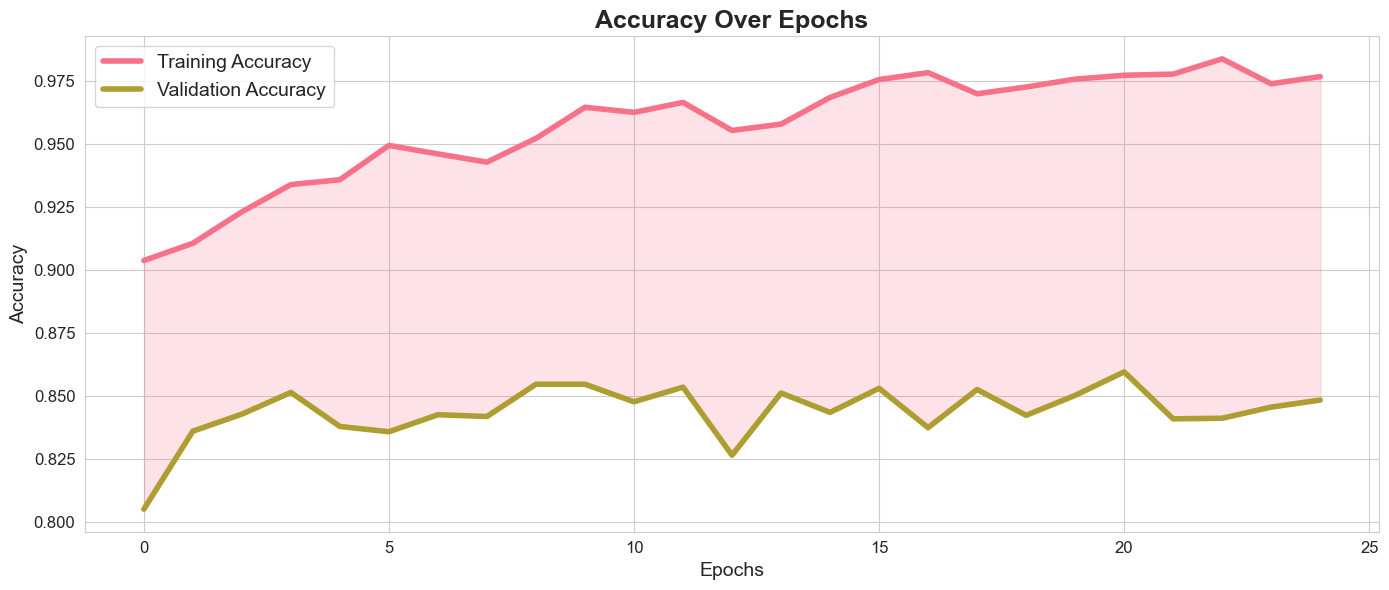

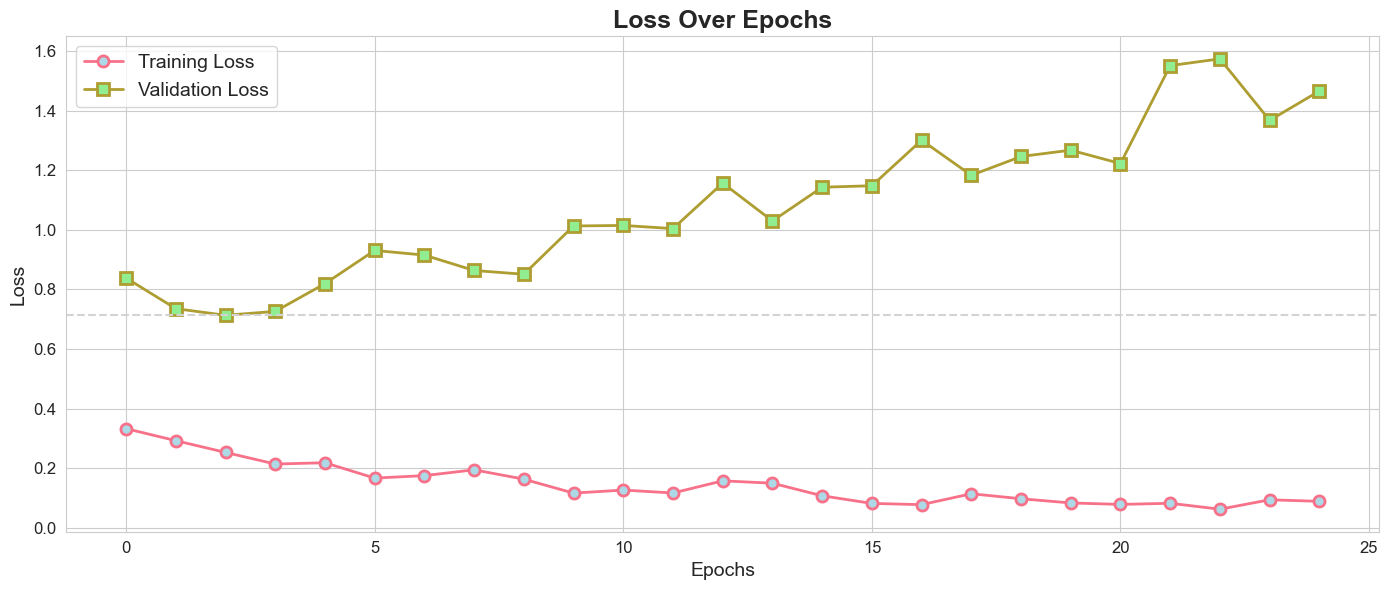

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Set a visually appealing style
sns.set_style('whitegrid')  # Clean background with gridlines
 
# Employ a vibrant color palette
colors = sns.color_palette('husl', 5)[:2]  # Select first two colors from a rich palette
 
# Plot accuracy with a smooth curve and shaded confidence region
plt.figure(figsize=(14, 6))  # Larger figure size
plt.plot(LNhistory.history['accuracy'], label='Training Accuracy', color=colors[0], linewidth=4)
plt.plot(LNhistory.history['val_accuracy'], label='Validation Accuracy', color=colors[1], linewidth=4)
plt.fill_between(range(len(LNhistory.history['accuracy'])), LNhistory.history['accuracy'], LNhistory.history['val_accuracy'], alpha=0.2, color=colors[0])  # Shaded confidence region
plt.title('Accuracy Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
# Plot loss with a semi-transparent background and enhanced markers
plt.figure(figsize=(14, 6))
plt.plot(LNhistory.history['loss'], label='Training Loss', color=colors[0], linewidth=2, marker='o', markersize=8, markerfacecolor='lightblue', markeredgewidth=2)
plt.plot(LNhistory.history['val_loss'], label='Validation Loss', color=colors[1], linewidth=2, marker='s', markersize=8, markerfacecolor='lightgreen', markeredgewidth=2)
plt.axhline(y=min(LNhistory.history['val_loss']), color='lightgray', linestyle='--', linewidth=1.5)  # Highlight minimum validation loss
plt.title('Loss Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
plt.show()

Testing Lenet-5

In [66]:
from sklearn.metrics import accuracy_score
import pandas as pd
from PIL import Image
import numpy as np

y_test_ln = pd.read_csv('Test.csv')
labels = y_test_ln["ClassId"].values
imgs = y_test_ln["Path"].values

data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((32, 32))
    data.append(np.array(image))
X_test_ln = np.array(data)

# Make predictions using predict
ln_pred_probabilities = LNModel.predict(X_test_ln)  # Get class probabilities
ln_pred = np.argmax(ln_pred_probabilities, axis=1)  # Get class labels from probabilities

# Accuracy calculation
print(accuracy_score(labels, ln_pred))

395/395 [==============================] - 2s 4ms/step
0.7505146476642913


**ResNet CNN Model**

In [6]:
# Make copies of Glodata and Glolabels
rn_data = np.copy(Glodata)
rn_label = np.copy(Glolabels)

In [7]:
#train test split of images

from keras.utils import to_categorical
print("\n",rn_data.shape, rn_label.shape)
X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(rn_data, rn_label, test_size=0.2, random_state=42)
print("\n",X_train_rn.shape, X_test_rn.shape, y_train_rn.shape, y_test_rn.shape)
print("\n",y_train_rn," ",y_test_rn)
y_train_rn = to_categorical(y_train_rn, 43)
y_test_rn = to_categorical(y_test_rn, 43)
print("\n",y_train_rn," ",y_test_rn)


 (21500, 32, 32, 3) (21500,)

 (17200, 32, 32, 3) (4300, 32, 32, 3) (17200,) (4300,)

 [17 21 23 ... 10  1 31]   [40 13 33 ... 16 26 23]

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]   [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
from tensorflow.keras.applications import ResNet50

# Define the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

RNModel = Sequential()
RNModel.add(base_model)
RNModel.add(Flatten())
RNModel.add(Dense(120, activation='relu'))
RNModel.add(Dense(84, activation='relu'))
RNModel.add(Dense(43, activation='softmax'))  # Assuming 43 classes for traffic sign recognition

RNModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
RNModel.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 120)               245880    
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                                 
 dense_2 (Dense)             (None, 43)                3655      
                                                                 
Total params: 23847411 (90.97 MB)
Trainable params: 23794291 (90.77 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [9]:
# Number of epochs for training
RNepochs = 25
# Train the model
RNhistory = RNModel.fit(X_train_rn, y_train_rn, batch_size=96, epochs=RNepochs, validation_data=(X_test_rn, y_test_rn))

Epoch 1/25


180/180 [==============================] - 219s 1s/step - loss: 1.4028 - accuracy: 0.6149 - val_loss: 4.4022 - val_accuracy: 0.5707
Epoch 2/25
180/180 [==============================] - 191s 1s/step - loss: 0.4881 - accuracy: 0.8563 - val_loss: 0.7691 - val_accuracy: 0.8086
Epoch 3/25
180/180 [==============================] - 189s 1s/step - loss: 0.3680 - accuracy: 0.8930 - val_loss: 0.5238 - val_accuracy: 0.8595
Epoch 4/25
180/180 [==============================] - 188s 1s/step - loss: 0.3009 - accuracy: 0.9082 - val_loss: 0.8596 - val_accuracy: 0.7947
Epoch 5/25
180/180 [==============================] - 193s 1s/step - loss: 0.2654 - accuracy: 0.9187 - val_loss: 0.3292 - val_accuracy: 0.8998
Epoch 6/25
180/180 [==============================] - 193s 1s/step - loss: 0.2582 - accuracy: 0.9258 - val_loss: 0.5589 - val_accuracy: 0.8451
Epoch 7/25
180/180 [==============================] - 192s 1s/step - loss: 0.1718 - accuracy: 0.9468 - val_loss: 1.6123 - val_accuracy: 0.87

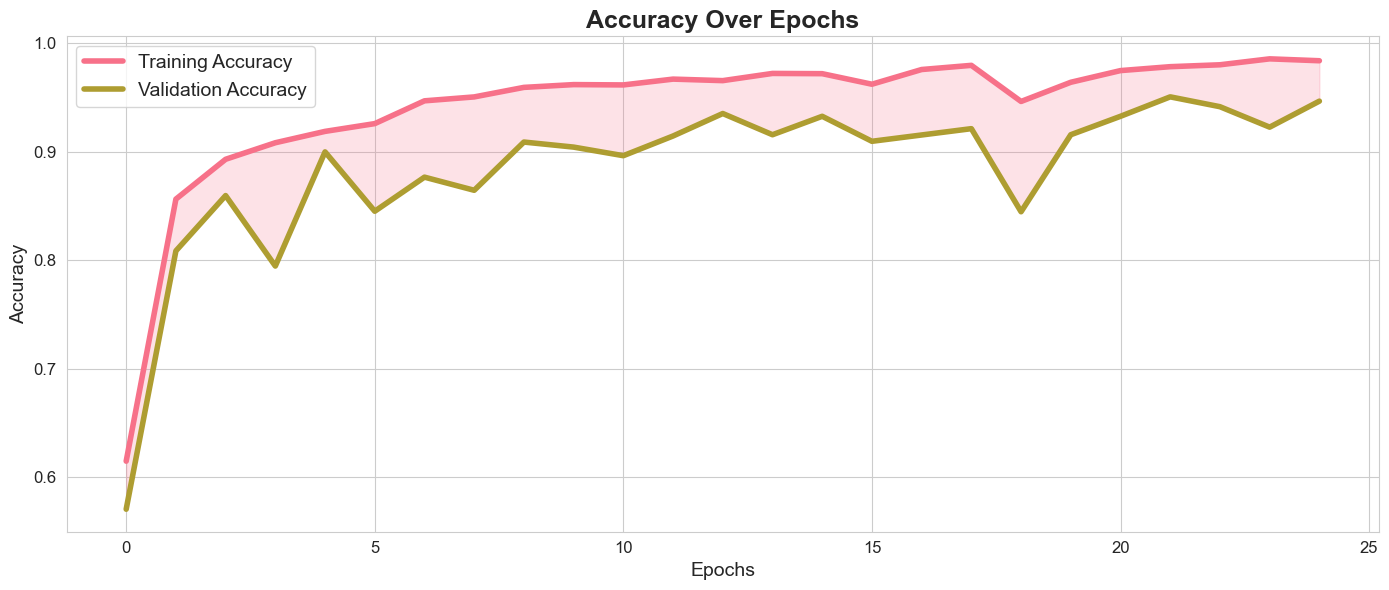

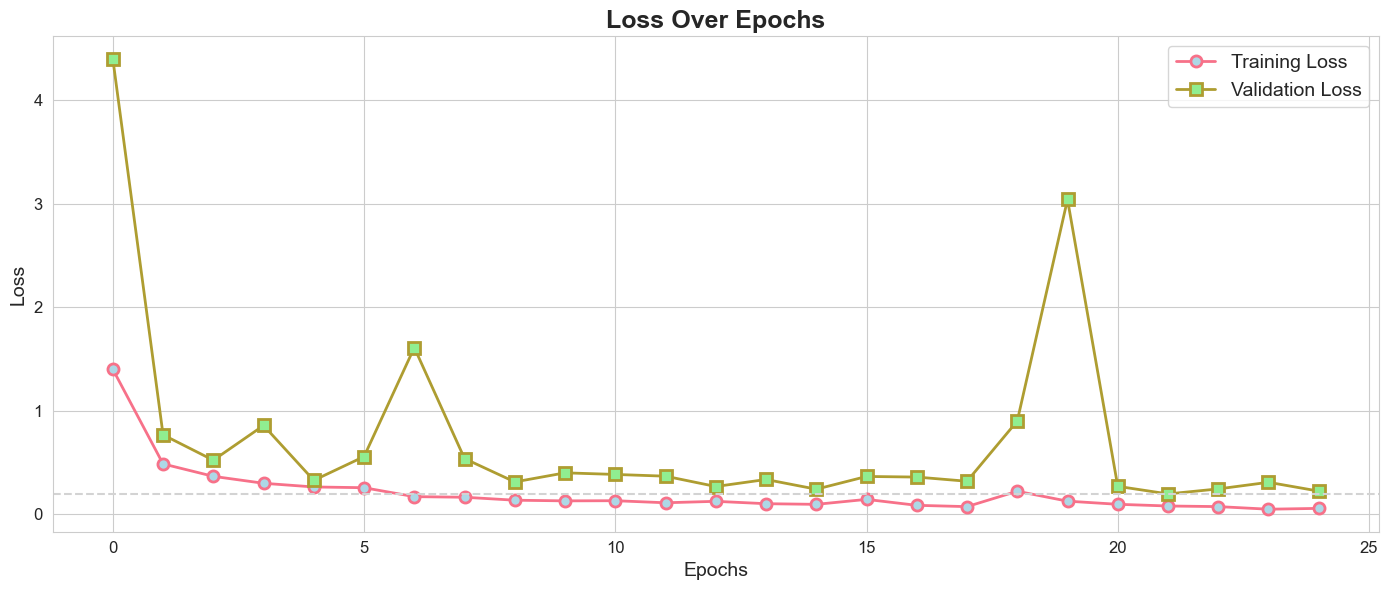

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Set a visually appealing style
sns.set_style('whitegrid')  # Clean background with gridlines
 
# Employ a vibrant color palette
colors = sns.color_palette('husl', 5)[:2]  # Select first two colors from a rich palette
 
# Plot accuracy with a smooth curve and shaded confidence region
plt.figure(figsize=(14, 6))  # Larger figure size
plt.plot(RNhistory.history['accuracy'], label='Training Accuracy', color=colors[0], linewidth=4)
plt.plot(RNhistory.history['val_accuracy'], label='Validation Accuracy', color=colors[1], linewidth=4)
plt.fill_between(range(len(RNhistory.history['accuracy'])), RNhistory.history['accuracy'], RNhistory.history['val_accuracy'], alpha=0.2, color=colors[0])  # Shaded confidence region
plt.title('Accuracy Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
# Plot loss with a semi-transparent background and enhanced markers
plt.figure(figsize=(14, 6))
plt.plot(RNhistory.history['loss'], label='Training Loss', color=colors[0], linewidth=2, marker='o', markersize=8, markerfacecolor='lightblue', markeredgewidth=2)
plt.plot(RNhistory.history['val_loss'], label='Validation Loss', color=colors[1], linewidth=2, marker='s', markersize=8, markerfacecolor='lightgreen', markeredgewidth=2)
plt.axhline(y=min(RNhistory.history['val_loss']), color='lightgray', linestyle='--', linewidth=1.5)  # Highlight minimum validation loss
plt.title('Loss Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
plt.show()

Testing Resnet CNN Model

In [11]:
from sklearn.metrics import accuracy_score
import pandas as pd
from PIL import Image
import numpy as np

y_test_rn = pd.read_csv('Test.csv')
labels = y_test_rn["ClassId"].values
imgs = y_test_rn["Path"].values

data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((32, 32))
    data.append(np.array(image))
X_test_rn = np.array(data)

# Make predictions using predict
rn_pred_probabilities = RNModel.predict(X_test_rn)  # Get class probabilities
rn_pred = np.argmax(rn_pred_probabilities, axis=1)  # Get class labels from probabilities

# Accuracy calculation
print(accuracy_score(labels, rn_pred))

395/395 [==============================] - 42s 101ms/step
0.8148060174188441
